Code to experiment with cascading failures, ie when a node goes to zero that is not part of a predicted subnetwork

In [1]:
from Graphclass_module import Graphclass
import numpy as np

In [50]:
G = Graphclass(8,15,3)

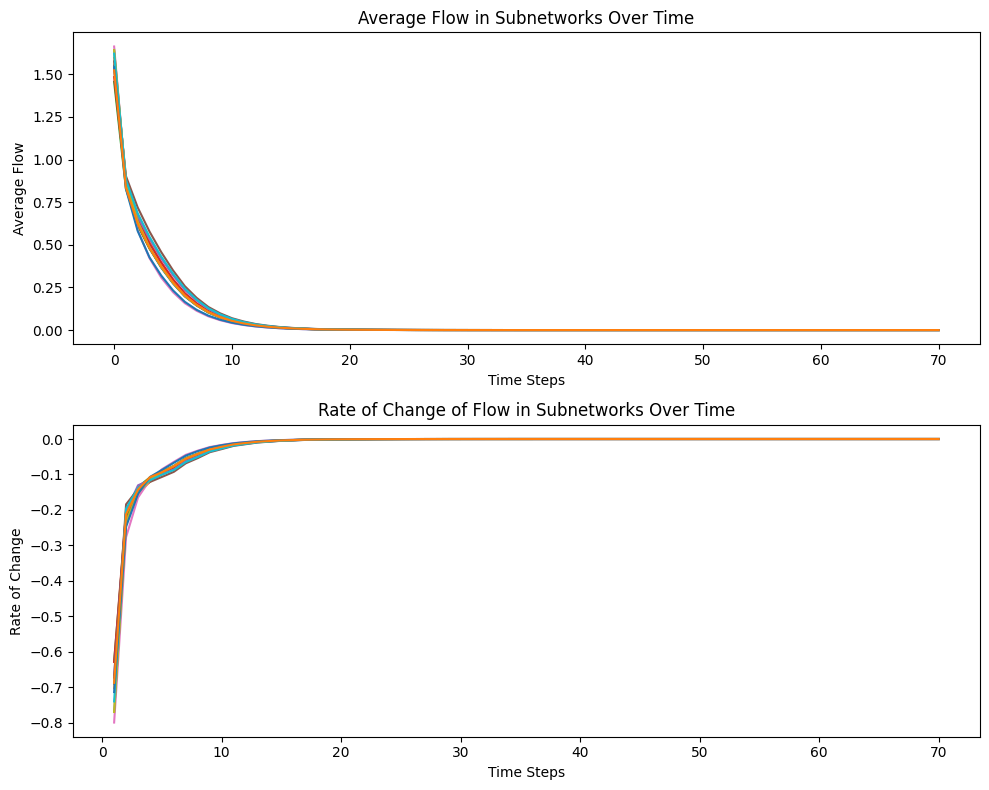

In [51]:
G.visualize_flow_of_subnetworks()

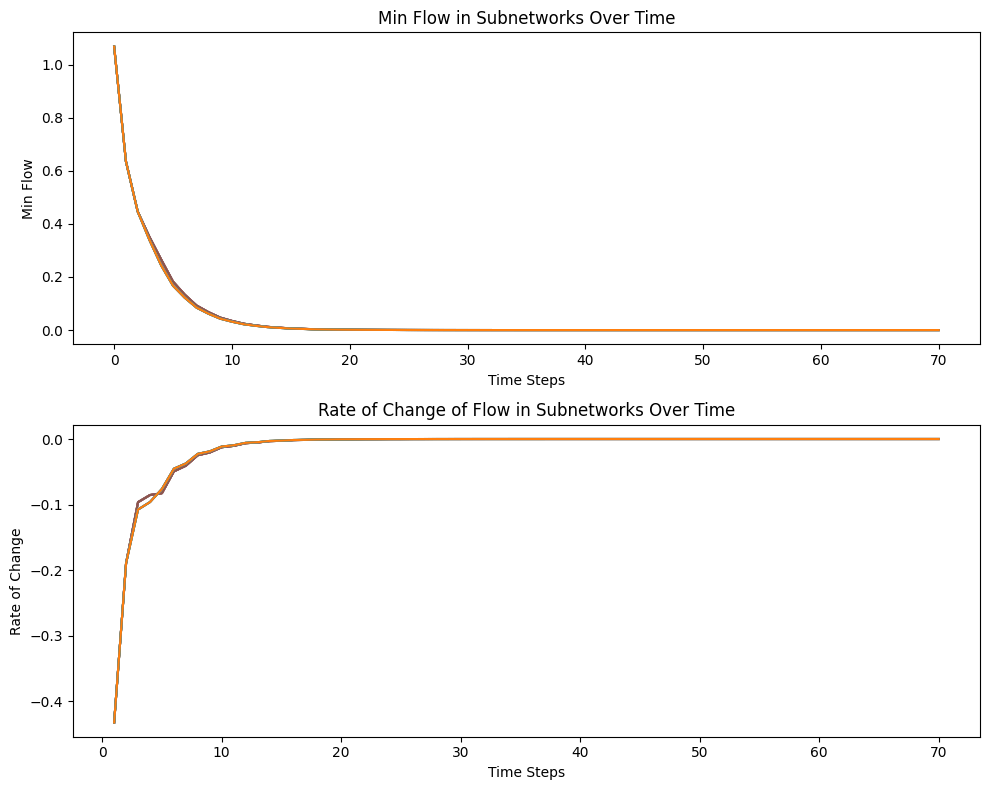

In [52]:
G.visualize_flow_of_subnetworks('min')

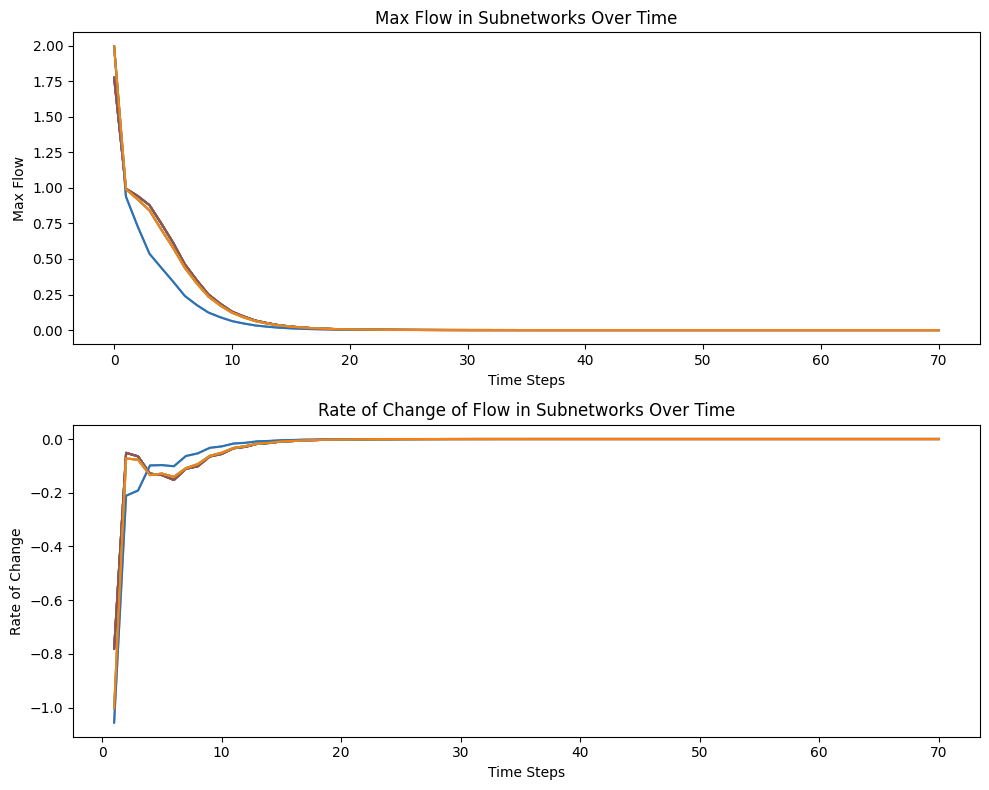

In [53]:
G.visualize_flow_of_subnetworks('max')

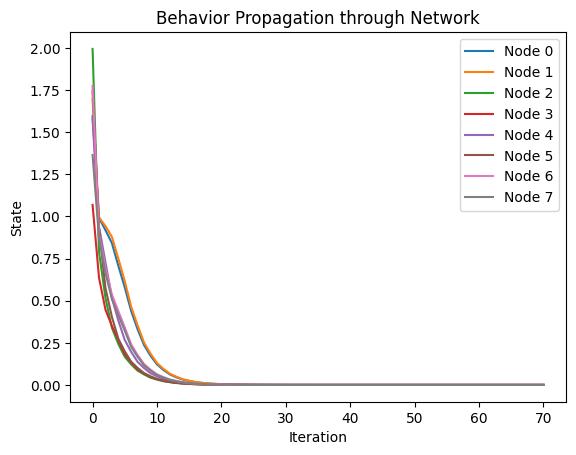

In [54]:
G.visualize_behavior()

Experiment to see whether a subnetwork can be contained inside another larger subnetwork

In [59]:
jtotal = []
jdirtytotal = []
for q in range(250):
    jcount = 0
    jdirtycount = 0
    n = 25
    c = 3
    G = Graphclass(15,10,2,True)
    k = len(G.full_subnetwork)
    dk = len(G.dirty_full_subnetwork)
    for k in range(len(G.full_subnetwork)):
        for i, subnetwork in enumerate(G.full_subnetwork[k]):
            sub = set(subnetwork)
            for j, othersubnetwork in enumerate(G.full_subnetwork[k]):
                if i != j:
                    other = set(othersubnetwork)
                    if other.issubset(sub):
                        jcount +=1
    for k in range(len(G.dirty_full_subnetwork)):
        for i, subnetwork in enumerate(G.dirty_full_subnetwork[k]):
            sub = set(subnetwork)
            for j, othersubnetwork in enumerate(G.dirty_full_subnetwork[k]):
                if i != j:
                    other = set(othersubnetwork)
                    if other.issubset(sub):
                        jdirtycount +=1
    jcount/=k
    jdirtycount/=dk
    jtotal.append(jcount)
    jdirtytotal.append(jdirtycount)
print('Average percent of subnetworks as subsets')
print(np.mean(jtotal))
print('Average percent of subnetworks as subsets in dirty subnetworks')
print(np.mean(jdirtytotal))


Average percent of subnetworks as subsets
3.1668571428571433
Average percent of subnetworks as subsets in dirty subnetworks
0.0


In [61]:
for i in range(205):
    n = 15
    c = 2
    G = Graphclass(n,1,c,True)
    for node in G.zero_nodes:
        if node not in G.dirty_full_predicted:
            print('found one')
            for j in range(len(G.dirty_full_subnetwork)):
                for b in range(len(G.dirty_full_subnetwork[j])):
                    for v,_,_ in G.dirty_full_subnetwork[j][b]:
                        if v == node:
                            print(' dirty found node was in a subnetwork')
        if node not in G.full_predicted:
            print('found a hanging node which went to zero')
            for j in range(len(G.full_subnetwork)):
                for b in range(len(G.full_subnetwork[j])):
                    for v,_,_ in G.full_subnetwork[j][b]:
                        if v == node:
                            print('found node was in a subnetwork')
                            print(G.full_radii[j][b])
        print()

    











found a hanging node which went to zero
found node was in a subnetwork
1.238161196004992
found node was in a subnetwork
1.3944441718816465
found node was in a subnetwork
1.0215258581962432
found node was in a subnetwork
1.238161196004992
found node was in a subnetwork
1.238161196004992
found node was in a subnetwork
1.3944441718816465
found node was in a subnetwork
1.0215258581962432
found node was in a subnetwork
1.0083922783538535
found node was in a subnetwork
1.0083922783538535
found node was in a subnetwork
1.238161196004992
found node was in a subnetwork
1.3944441718816465
found node was in a subnetwork
1.0215258581962432
found node was in a subnetwork
1.0083922783538541
found node was in a subnetwork
1.3944441718816465
found node was in a subnetwork
1.0083922783538535
found node was in a subnetwork
1.238161196004992
found node was in a subnetwork
1.0215258581962432
found node was in a subnetwork
1.0083922783538535
found node was in a subnetwork
1.0215258581962432
found

In [49]:
for i in range(25):
    chaos = 0
    n = np.random.randint(25,35)
    c = np.random.randint(3,8)
    G = Graphclass(15,10,2,True)
    e = G.initial_lyapunov()
    if e > 0:
        chaos +=1
chaos /= 100
print(f'percent chaotic {chaos}')

percent chaotic 0.0
